In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [10]:
data1 = pd.read_csv(r"D:\Python\Project\Nov-2021.csv", encoding="latin-1")

D1=data1.iloc[3:]
D1=D1.T
D1.columns=D1.iloc[0]
D1.index=D1['Sl.No.']
D1.columns=D1.iloc[1]
D1=D1[2:]
col_to_keep=['Schedules','Fleet Held','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
D1.head()
D1.count()

Factor
Schedules                         17
Fleet Held                        17
Fleet Utilisation (%)             17
% off road  vehicles              17
Schedule kms (in lakh)            17
Effective Kilometers (in lakh)    17
dtype: int64

In [11]:
D1=D1[:17]
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns
#remove empty rows
D1.dropna(inplace=True)
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id
Sl.No.,,,,,,,
BNG©,570,743,67.4,6.2,60.35,65.31,1
RMN,469,498,80.4,4.9,38.99,39.71,2
TMK,574,619,86.2,4.8,57.22,54,3
KLR,516,539,85.2,2.4,44,46.59,4
CBP,514,564,87.6,2.9,47.64,51.25,5
MYS(U),372,431,77.3,3.9,18.81,19.42,6
MYS(R),622,685,82.7,4.2,61.35,64.93,7
MDY,414,448,79.9,7.2,35.42,36.49,8
CJR,448,509,88.5,5.3,41.39,44.74,9


In [12]:
D1.columns

Index(['Schedules', 'Fleet Held', 'Fleet Utilisation (%)',
       '% off road  vehicles', 'Schedule kms (in lakh)',
       'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Factor')

In [13]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')

FleetUtilisation=D1['Fleet Utilisation (%)']

FleetHeldArray=D1['Fleet Held']
FleetHeldArray=FleetHeldArray.astype('float64')
FleetUtilisation=FleetUtilisation.astype('float64')
FleetUtilisation=FleetUtilisation*0.01
EffPassDensity=np.multiply(FleetUtilisation,FleetHeldArray)
D1['EffPassDensity']=EffPassDensity
D1


Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,570,743,67.4,6.2,60.35,65.31,1,500.782
RMN,469,498,80.4,4.9,38.99,39.71,2,400.392
TMK,574,619,86.2,4.8,57.22,54,3,533.578
KLR,516,539,85.2,2.4,44,46.59,4,459.228
CBP,514,564,87.6,2.9,47.64,51.25,5,494.064
MYS(U),372,431,77.3,3.9,18.81,19.42,6,333.163
MYS(R),622,685,82.7,4.2,61.35,64.93,7,566.495
MDY,414,448,79.9,7.2,35.42,36.49,8,357.952
CJR,448,509,88.5,5.3,41.39,44.74,9,450.465


In [14]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, BNG© to CDG
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       16 non-null     object 
 1   Fleet Held                      16 non-null     object 
 2   Fleet Utilisation (%)           16 non-null     object 
 3   % off road  vehicles            16 non-null     object 
 4   Schedule kms (in lakh)          16 non-null     object 
 5   Effective Kilometers (in lakh)  16 non-null     object 
 6   City_Id                         16 non-null     int64  
 7   EffPassDensity                  16 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


In [15]:
D1.head()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,570,743,67.4,6.2,60.35,65.31,1,500.782
RMN,469,498,80.4,4.9,38.99,39.71,2,400.392
TMK,574,619,86.2,4.8,57.22,54,3,533.578
KLR,516,539,85.2,2.4,44,46.59,4,459.228
CBP,514,564,87.6,2.9,47.64,51.25,5,494.064


In [16]:
D1.tail()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
MNG,475,589,78.1,5.5,49.11,49.36,12,460.009
PTR,479,548,83,6.1,44.14,43.26,13,454.840
DVG,332,353,94,3.8,33.66,34.38,14,331.820
SMG,302,352,80.7,4,30.67,32.76,15,284.064
CDG,261,302,86.3,6.5,26.45,27.12,16,260.626


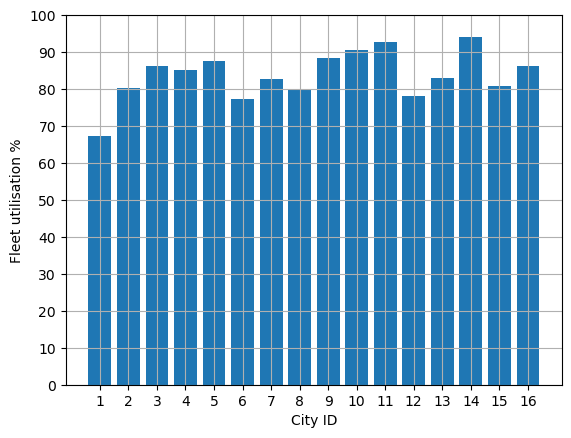

In [17]:
import matplotlib.pyplot as plt
X=D1['City_Id']
Y=D1['Fleet Utilisation (%)'].astype(float)
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Fleet utilisation %')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()


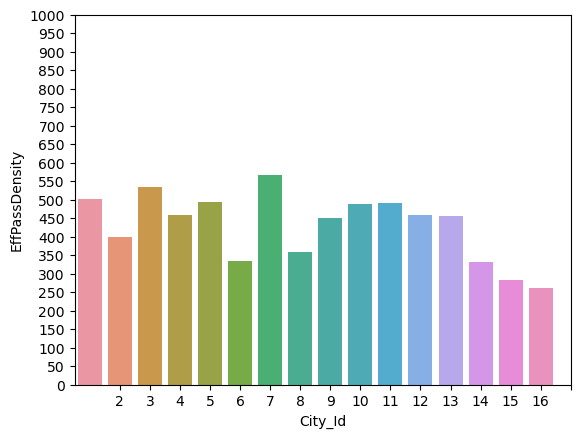

In [18]:
X=D1['City_Id']
Y=D1['EffPassDensity']
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()


## Descriptive Statistic Analysis
Mean of EffectivePassengerDensity = meanEPD

In [19]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of Effective Passenger Density:',meanEPD)

D1['EffPassDensity'].values


Mean of Effective Passenger Density: 429.16887499999996


array([500.782, 400.392, 533.578, 459.228, 494.064, 333.163, 566.495,
       357.952, 450.465, 489.24 , 489.984, 460.009, 454.84 , 331.82 ,
       284.064, 260.626])

In [20]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 8228.651405583336
Standard deviation: 90.71191435298527


In [21]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'EffPassDensity':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,EffPassDensity,Mean Variations
0,1,500.782,71.613125
1,2,400.392,-28.776875
2,3,533.578,104.409125
3,4,459.228,30.059125
4,5,494.064,64.895125
5,6,333.163,-96.005875
6,7,566.495,137.326125
7,8,357.952,-71.216875
8,9,450.465,21.296125
9,10,489.240,60.071125


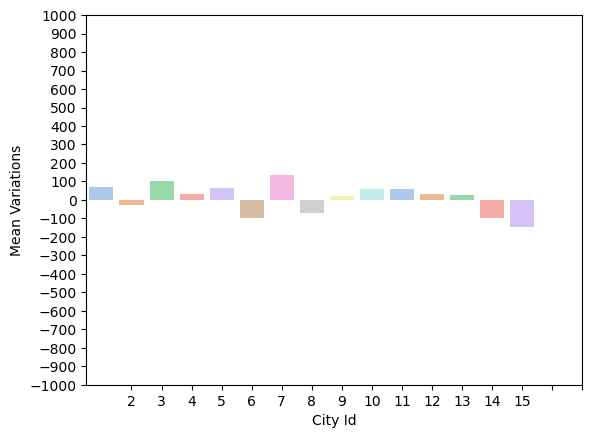

In [22]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\abhib\AppData\Local\Temp\ipykernel_19140\488825496.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: ylabel='Density'>

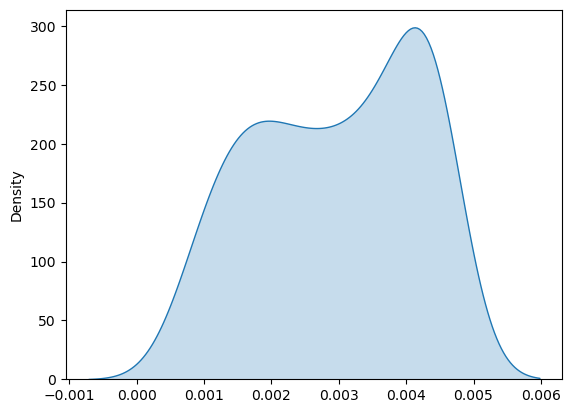

In [23]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['EffPassDensity'])
sd = np.std(D1['EffPassDensity'])
sorted_data = D1['EffPassDensity'].sort_values()
X=np.linspace(D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)


In [24]:
'''Stats = D1.describe(include='all')
rows = Stats.index.tolist()
Stats
D1
for i in rows:
    for j in D1.columns:
        value = D1.loc[i, j]
        
        if isinstance(value, str):
            cleaned_value = float(value)  # Remove dots
            try:
                D1.loc[i, j] = float(cleaned_value)
            except ValueError:
                pass  # Handle values that cannot be converted

D1
for i in rows:
    for j in D1.columns:
        print(i,j,type(D1.loc[i,j]))
        print(D1.loc[i,j])'''

"Stats = D1.describe(include='all')\nrows = Stats.index.tolist()\nStats\nD1\nfor i in rows:\n    for j in D1.columns:\n        value = D1.loc[i, j]\n        \n        if isinstance(value, str):\n            cleaned_value = float(value)  # Remove dots\n            try:\n                D1.loc[i, j] = float(cleaned_value)\n            except ValueError:\n                pass  # Handle values that cannot be converted\n\nD1\nfor i in rows:\n    for j in D1.columns:\n        print(i,j,type(D1.loc[i,j]))\n        print(D1.loc[i,j])"

In [25]:

D1
    

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,570,743,67.4,6.2,60.35,65.31,1,500.782
RMN,469,498,80.4,4.9,38.99,39.71,2,400.392
TMK,574,619,86.2,4.8,57.22,54,3,533.578
KLR,516,539,85.2,2.4,44,46.59,4,459.228
CBP,514,564,87.6,2.9,47.64,51.25,5,494.064
MYS(U),372,431,77.3,3.9,18.81,19.42,6,333.163
MYS(R),622,685,82.7,4.2,61.35,64.93,7,566.495
MDY,414,448,79.9,7.2,35.42,36.49,8,357.952
CJR,448,509,88.5,5.3,41.39,44.74,9,450.465


In [26]:
'''
for j in rows:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%':
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

Stats'''

"\nfor j in rows:\n    for i in Stats.columns:\n        if j == 'mean' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].mean()\n        elif j == 'std' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].std()\n        elif j == 'min' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].min()\n        elif j == 'max' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].max()\n        elif j == '25%' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].quantile(q=0.25)\n        elif j == '50%' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].quantile(q=0.50)\n        elif j == '75%':\n            Stats.loc[j, i] = D1[i].quantile(q=0.75)\n\nStats"

<class 'numpy.float64'>


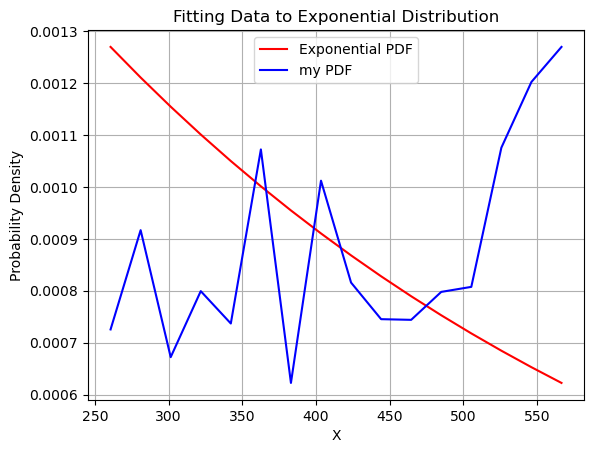

[0.0012695  0.00121059 0.00115442 0.00110085 0.00104977 0.00100106
 0.00095461 0.00091031 0.00086807 0.00082779 0.00078938 0.00075275
 0.00071782 0.00068451 0.00065275 0.00062246] [0.00072545 0.00091664 0.00067208 0.00079921 0.0007369  0.00107209
 0.00062246 0.00101192 0.00081569 0.00074523 0.00074394 0.00079775
 0.00080742 0.00107545 0.00120203 0.0012695 ]


In [27]:
from scipy.stats import expon

# Given data
data = D1['EffPassDensity'][0:16].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 16)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [28]:
import statistics as stats
from scipy.stats import norm 
import scipy.stats
Xfactor=D1['EffPassDensity'][:16].values
Yfactor=D1['Effective Kilometers (in lakh)'][:16].values
converted_values = []

for value in Yfactor:
    float_value = float(value)  # Convert string to float
    converted_values.append(float_value)
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,converted_values)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])


16 16
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.9035856545302732


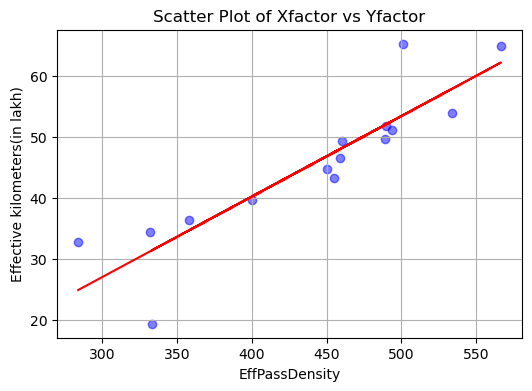

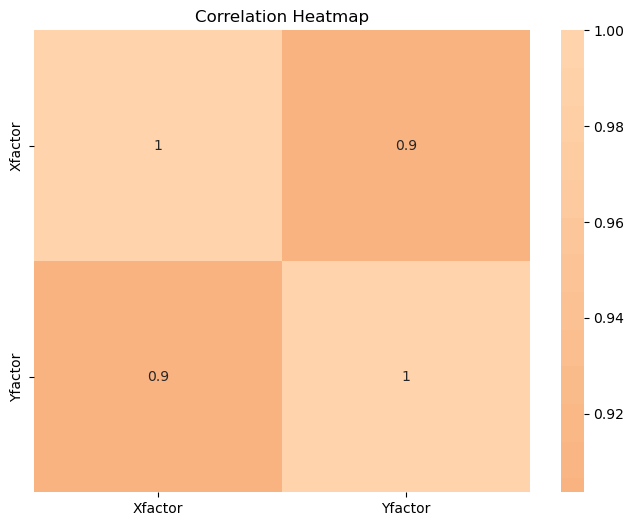

In [29]:
data = {
    'Xfactor': D1['EffPassDensity'][:16].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:16].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('EffPassDensity')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True,center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()
